# Reading Data and computing $U,V$

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [75]:
# uses joeys code copypastad from his notebook, should ideally put this in a data utils or something
with open('data/movies.txt', 'r') as f:
    movies = f.read().split('\r')
with open ('data/data.txt', 'r') as f:
    ratings = f.read().split('\r')

movies_list = []
for m in movies:
    movies_list.append(m.split('\t'))

ratings_list = []
for r in ratings:
    ratings_list.append(r.split('\t'))

movies_df = pd.DataFrame(movies_list, columns = ['Movie Id', 'Movie Title', 'Unknown', 'Action', 'Adventure', 'Animation',\
                                                 'Childrens', 'Comedy', 'Crime', 'Documentary', \
                                                 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', \
                                                 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])

ratings_df =  pd.DataFrame(ratings_list, columns = ['User Id', 'Movie Id', 'Rating'])

movies_df =  movies_df.apply(pd.to_numeric, errors='ignore')
ratings_df = ratings_df.apply(pd.to_numeric)
r_df = ratings_df.pivot(index = 'Movie Id', columns ='User Id', values = 'Rating').fillna(0)

In [7]:
# currently uses rohan's code for factorization, may not be ideal but can replace later
from factorize import factorize,error

In [6]:
Y = np.loadtxt("data/ratings.out",delimiter = ',')

In [8]:
k = 20 # use 20 latent factors
reg = .1 # empirically from plots this was good
U,V = factorize(Y,k,reg_val = reg)

In [41]:
# get SVD of U and project it
a,b,c = np.linalg.svd(U)
print np.shape(a)
print np.shape(b)
print np.shape(c)
print np.shape(U) # U has the movies
U_proj = np.dot(U,c[:2].T)
print np.shape(U_proj)

(1682, 1682)
(20,)
(20, 20)
(1682, 20)
(1682, 2)


Now we have latent vectors U and V, projected into 2-d space. We want to visualize them. U contains features for each movie, while V contains features for each user. 

# Ten Random Movies

In [73]:
inds = np.random.choice(range(1682),10)
vals = U_proj[inds]
xs = vals[:,0]
ys = vals[:,1]
titles = np.array(movies_df["Movie Title"].tolist())[inds] # gets 10 random movies

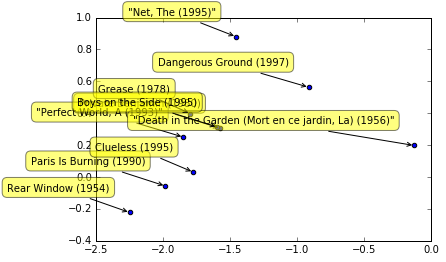

In [74]:
plt.scatter(xs, ys, marker='o')

for label, x, y in zip(titles, xs, ys): # probably should fix this up to be better
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

# Ten Most Popular Movies

In [110]:
r_df['Total Ratings'] = (r_df != 0).sum(axis=1)
ten_most_popular = r_df.sort_values('Total Ratings', ascending=False)[:10].index
ten_most_popular_inds = np.array(ten_most_popular)-1
vals = U_proj[ten_most_popular_inds]
xs = vals[:,0]
ys = vals[:,1]
titles = np.array(movies_df["Movie Title"].tolist())[ten_most_popular_inds] 

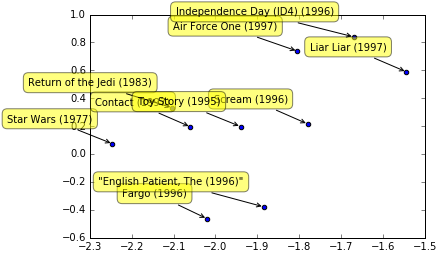

In [111]:
plt.scatter(xs, ys, marker='o')

for label, x, y in zip(titles, xs, ys): # probably should fix this up to be better
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

# Ten best movies 

In [85]:
r_filtered_df = r_df[r_df['Total Ratings'] >= 5].drop(['Total Ratings'], axis=1)
r_filtered_df['Average Rating'] = r_filtered_df.replace(0, np.nan).mean(axis=1)
r_filtered_df.sort_values(['Average Rating'], ascending=False)[:10]
ten_best = r_filtered_df.sort_values(['Average Rating'], ascending=False)[:10].index
ten_best_inds = np.array(ten_best) -1
vals = U_proj[ten_best_inds]
xs = vals[:,0]
ys = vals[:,1]
titles = np.array(movies_df["Movie Title"].tolist())[ten_best_inds] 

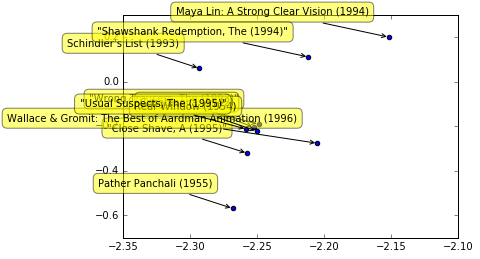

In [87]:
plt.scatter(xs, ys, marker='o')

for label, x, y in zip(titles, xs, ys): # probably should fix this up to be better
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

# Ten Best from 3 genres

In [ ]:
genres = ['Drama', 'Comedy', 'Thriller'] #top 3 most popular genres

## Drama 

In [125]:
drama_movies = movies_df[movies_df['Drama'] == 1]['Movie Id'].values
drama_movies_inds = np.random.choice(np.array(drama_movies)-1,10)
# pick ten random ones, can do ten best or ten most pop later
vals = U_proj[drama_movies_inds]
xs = vals[:,0]
ys = vals[:,1]
titles = np.array(movies_df["Movie Title"].tolist())[drama_movies_inds]

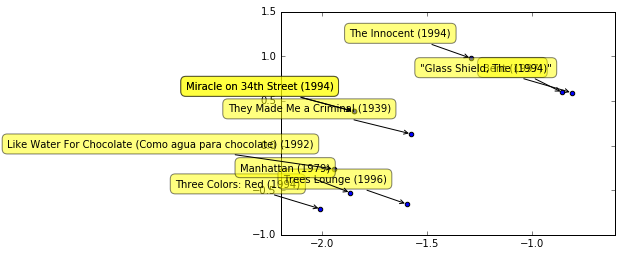

In [126]:
plt.scatter(xs, ys, marker='o')

for label, x, y in zip(titles, xs, ys): # probably should fix this up to be better
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

## Comedy 

In [127]:
comedy_movies = movies_df[movies_df['Comedy'] == 1]['Movie Id'].values
comedy_movies_inds = np.random.choice(np.array(comedy_movies)-1,10)
# pick ten random ones, can do ten best or ten most pop later
vals = U_proj[comedy_movies_inds]
xs = vals[:,0]
ys = vals[:,1]
titles = np.array(movies_df["Movie Title"].tolist())[comedy_movies_inds]

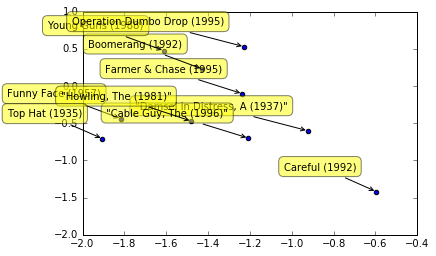

In [124]:
plt.scatter(xs, ys, marker='o')

for label, x, y in zip(titles, xs, ys): # probably should fix this up to be better
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

## Thriller

In [129]:
thriller_movies = movies_df[movies_df['Thriller'] == 1]['Movie Id'].values
thriller_movies_inds = np.random.choice(np.array(thriller_movies)-1,10)
# pick ten random ones, can do ten best or ten most pop later
vals = U_proj[thriller_movies_inds]
xs = vals[:,0]
ys = vals[:,1]
titles = np.array(movies_df["Movie Title"].tolist())[thriller_movies_inds]

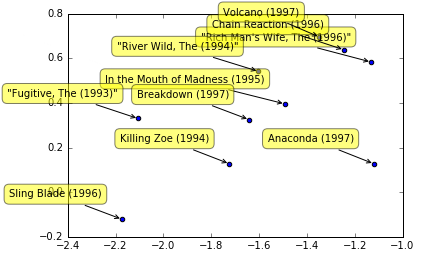

In [130]:
plt.scatter(xs, ys, marker='o')

for label, x, y in zip(titles, xs, ys): # probably should fix this up to be better
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))